In [333]:
import requests
from lxml import html
from time import sleep
from datetime import datetime, timedelta

import pickle



def get_entry_from_wikipedia(urlpage):
    code = requests.get(urlpage)
    htmltree = html.fromstring(code.content)
    return htmltree


def get_table_from_wikipedia(htmltree):
    try:
        tabla = htmltree.get_element_by_id("thetable")
    except:
        tabla = None
        
    if tabla is None:
        try:
            tabla = htmltree.xpath('/html/body/div[3]/div[3]/div[5]/div[1]/div[3]/table')[0]
        except:
            tabla = None
            
    if tabla is None:
        try:
            tabla = htmltree.xpath('/html/body/div[3]/div[3]/div[5]/div[1]/div[2]/table')[0]
        except:
            tabla = None
    
    if tabla is None:
        return None, fecha
    rows = tabla.getchildren()[-1].getchildren()
    rawrows = rows
    fecha = rows[-2].text_content().split(":")[1].split(",")[0].strip()
    rows = [r.getchildren() for r in rows]
    rows = [[ f.text_content().replace(",","").replace("\n","") if f.text_content() is not None else f for f in r] for r in rows]
    
    field_prov = 0
    if type(rows[1][0]) is str:
        testarg = rows[1][0].replace("\n","").strip()
    else:
        testarg = rows[1][0].text_content().replace("\n","").strip()
        
    if  not testarg in ("Argentina","Buenos Aires(Autonomous City)"):
        field_prov = 1
        if type(rows[1][1]) is str:
            testarg = rows[1][1].replace("\n","").strip()
        else:
            testarg = rows[1][1].text_content().replace("\n","").strip()

    datosargentina = {}
    for r in rows:
        if len(r)<4:
            break
        elif r[field_prov] in ("Region", "Province", "District", "Cases", "Cases[a][b]"):
            continue
        if field_prov == 1 and r[0].strip() == "24":
            provincia = "Argentina"
            fieldcasos = field_prov 
            field_muertos = field_prov + 1
            field_recuperados = field_prov + 2
        else:
            provincia = r[field_prov]
            fieldcasos = field_prov + 1
            field_muertos = field_prov + 2
            field_recuperados = field_prov + 3
        
        if provincia in ("Buenos Aires (Autonomous City)", "Buenos Aires (C)[c]", "Buenos Aires (C)"):
            provincia = "CABA"
        if provincia in ("Buenos Aires (province)","Buenos Aires (P)","Buenos Aires (Province)"):
            provincia = "Buenos Aires"
            
        if provincia in ('Tierra del Fuego[b]','Tierra del Fuego'):
            provincia = 'Tierra del Fuego'
        

        if not (type(provincia) is str):
            provincia = provincia.text_content()
        provincia = provincia.replace("\n","").strip()
        datosargentina[provincia] = {}
        try:
            datosargentina[provincia]["Casos"] = int(r[fieldcasos])
        except:
            datosargentina[provincia]["Casos"] = None
        try:
            datosargentina[provincia]["Muertos"] = int(r[field_muertos])
        except:
            datosargentina[provincia]["Muertos"] = None
        try:
            datosargentina[provincia]["Recuperados"] = int(r[field_recuperados])
        except:
            datosargentina[provincia]["Recuperados"] = None
    return datosargentina


def recover_history_from_wikipedia():
    urlbase = "https://en.wikipedia.org/w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&action=history"
    code = requests.get(urlbase)
    htmltree = html.fromstring(code.content)
    elements = htmltree.get_element_by_id("pagehistory")
    entries = elements.getchildren()
    entries = [entry.getchildren() for entry in entries]
    entries = [(entry[3].text,entry[3].attrib["href"]) for entry in entries]
    print("Construyendo historia")

    historia = {}
    htmltrees = {}
    for entry in entries:
        print("levantando " + entry[0] + "  from "+ entry[1])
        url = "https://en.wikipedia.org" + entry[1]
        htmltrees[entry[0]] = get_entry_from_wikipedia(url)
        historia[entry[0]] = get_table_from_wikipedia(htmltrees[entry[0]])
        sleep(1)
    return historia, htmltrees



def recover_history_from_stored():
    global htmltrees 
    for entry in entries:
        print("levantando " + entry[0] + "  from "+ entry[1])
        url = "https://en.wikipedia.org" + entry[1]
        historia[entry[0]] = get_table_from_wikipedia(htmltrees[entry[0]])
    return historia


In [336]:
historia = recover_history_from_stored()

levantando 13:34, 20 October 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=984511197
levantando 14:27, 19 October 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=984323855
levantando 14:26, 19 October 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=984323768
levantando 14:50, 18 October 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=984156220
levantando 14:32, 17 October 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=983992972
levantando 14:59, 16 October 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=983837719
levantando 02:54, 16 October 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=983761376

levantando 02:19, 16 August 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=973226141
levantando 16:41, 15 August 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=973143772
levantando 01:57, 15 August 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=973039104
levantando 01:52, 15 August 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=973038557
levantando 15:39, 14 August 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=972940945
levantando 01:28, 14 August 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=972836619
levantando 01:15, 14 August 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=972835011
levant

levantando 03:27, 4 July 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=965904613
levantando 17:37, 3 July 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=965832976
levantando 02:25, 3 July 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=965729992
levantando 17:15, 2 July 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=965660494
levantando 01:37, 2 July 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=965556933
levantando 16:07, 1 July 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=965485137
levantando 04:18, 1 July 2020  from /w/index.php?title=Template:COVID-19_pandemic_data/Argentina_medical_cases_by_province&oldid=965406740
levantando 18:41, 30 June 2

In [176]:
with open("wikipediatrees.pkl","wb") as file:
    pickle.dump(htmltrees,file)

TypeError: cannot pickle 'HtmlElement' object

In [337]:

    
with open("wikipediadata.pkl","wb") as file:
    pickle.dump(historia,file)

In [145]:
rows = htmltrees[keys[134]].xpath('/html/body/div[3]/div[3]/div[5]/div[1]/div[3]/table')[0].getchildren()[-1].getchildren()
field=rows[1].getchildren()[0]
field.text_content()

'\n'

In [338]:
provincias = ['Argentina',
 'CABA',
 'Buenos Aires',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Córdoba',
 'Corrientes',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago del Estero',
 'Tierra del Fuego',
 'Tucumán']

In [339]:
historiadistrito={}

for keydate in historia:
    day0=datetime.strptime("00:00, 22 January 2020",  '%H:%M, %d %B %Y')
    date=datetime.strptime(keydate,  '%H:%M, %d %B %Y')
    ndia = (date-day0).total_seconds()/(3600*24.)
    for key in provincias:
        if not (key in historia[keydate]):
            continue
        vals = historia[keydate][key]
        if not (key in historiadistrito):
            historiadistrito[key] = {
                "Fecha": [],
                "curve_recovered":[],
                "curve_death": [],
                "curve_confirmed": [],
            }
        historiadistrito[key]["Fecha"].append(ndia)
        historiadistrito[key]["curve_confirmed"].append(vals["Casos"])
        historiadistrito[key]["curve_death"].append(vals["Muertos"])
        historiadistrito[key]["curve_recovered"].append(vals["Recuperados"])
        

            


In [365]:
from __future__ import print_function, division
import pandas as pd

confirmed = {}
recovered = {}
deaths = {}

for provincia in historiadistrito:
    dictconfirmed = {}
    dictdeath = {}
    dictrecovered = {}
    fechas = []
    for i, val in enumerate(historiadistrito[provincia]["Fecha"]):
        dia = int(val)
        fechas.append(dia)
        dia = str(int(val)).strip()
        dictconfirmed[dia] = historiadistrito[provincia]["curve_confirmed"][i]
        dictrecovered[dia] = historiadistrito[provincia]["curve_recovered"][i]
        dictdeath[dia] = historiadistrito[provincia]["curve_death"][i]
    fechas = sorted(fechas)
    fechas = [str(int(f)).strip() for f in fechas]
    confirmed[provincia] =  [dictconfirmed.get(str(f+1).strip(),None) for f in range(249)]
    recovered[provincia] = [dictrecovered.get(str(f+1).strip(),None) for f in range(249)]
    deaths[provincia] =  [dictdeath.get(str(f+1).strip(),None) for f in range(249)]
    
bp_data = pd.DataFrame.from_dict(confirmed)
bp_data.to_csv("covid19-argentina-confirmed.csv", sep=" ")

bp_data = pd.DataFrame.from_dict(deaths)
bp_data.to_csv("covid19-argentina-deaths.csv", sep=" ")

bp_data = pd.DataFrame.from_dict(recovered)
bp_data.to_csv("covid19-argentina-recovered.csv", sep=" ")

In [366]:
bp_data

,Argentina,Buenos Aires,Catamarca,Chaco,Chubut,Córdoba,Corrientes,Entre Ríos,Formosa,Jujuy,...,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucumán,CABA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,517215.0,303941.0,101.0,6505.0,1912.0,10179.0,660.0,2522.0,93.0,7117.0,...,7725.0,6619.0,238.0,455.0,2872.0,20344.0,863.0,2179.0,5031.0,161079.0
245,525473.0,308113.0,101.0,6550.0,1912.0,10766.0,683.0,2670.0,93.0,7214.0,...,7926.0,6766.0,245.0,481.0,2885.0,21535.0,863.0,2237.0,5477.0,162602.0
246,536576.0,316944.0,103.0,6735.0,2115.0,13294.0,761.0,2730.0,96.0,7330.0,...,8087.0,7019.0,249.0,515.0,3059.0,22923.0,961.0,2310.0,5902.0,166125.0
247,546911.0,308194.0,106.0,6735.0,2162.0,13294.0,761.0,2804.0,98.0,7411.0,...,8301.0,7306.0,255.0,523.0,3119.0,24291.0,997.0,2380.0,6473.0,166125.0


In [ ]:
get

In [359]:
fechas[-1]

'249'

In [343]:
historiadistrito

{'Argentina': {'Fecha': [272.5652777777778,
   271.6020833333333,
   271.6013888888889,
   270.61805555555554,
   269.60555555555555,
   268.62430555555557,
   268.12083333333334,
   267.6347222222222,
   266.63958333333335,
   266.1277777777778,
   265.63680555555555,
   264.6298611111111,
   264.0986111111111,
   263.6458333333333,
   262.7048611111111,
   262.13055555555553,
   261.6,
   260.6875,
   260.13055555555553,
   259.73125,
   259.08819444444447,
   258.7076388888889,
   258.12083333333334,
   257.72430555555553,
   257.13402777777776,
   256.6847222222222,
   256.08819444444447,
   255.7,
   255.13819444444445,
   254.65347222222223,
   254.0611111111111,
   253.6798611111111,
   253.10763888888889,
   252.68680555555557,
   252.09444444444443,
   251.69166666666666,
   251.18055555555554,
   251.04861111111111,
   250.71180555555554,
   250.10555555555555,
   250.10486111111112,
   249.81944444444446,
   249.78472222222223,
   249.70277777777778,
   249.12708333333333,
 

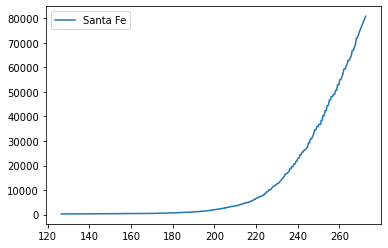

In [342]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


for distrito in ["Santa Fe"]:
    plt.plot(historiadistrito[distrito]["Fecha"],
             historiadistrito[distrito]["curve_confirmed"],label=distrito)

plt.legend()

In [ ]:
len(historia.keys())